### Playground IT2Mamdani Gaussian

In [10]:
from notebook_resolver import *
from src.utils.pandas_extension import *
from src.dataset import Dataset, WorkSheet

dataset_path = "data/e-nose_dataset_12_beef_cuts.xlsx"

dataset = Dataset(
	path=dataset_path, sheet_name=WorkSheet.DS2.value,
)

train_df = dataset.train_df
test_df = dataset.validate_df


In [11]:
from sklearn.metrics import r2_score
from src.pipeline import Pipeline
from src.pipelines.transformers import FeatureScaler
from src.pipelines.predictors import IT2MamdaniPredictor
from src.fis.fuzzy_logic.mfs import MFType2
from src.clusters import ClusteringMethod

target_column = 'TVC'

pipeline = Pipeline(steps=[
	('feature_scaler', FeatureScaler(decimal_places=4)),
	('predictor', IT2MamdaniPredictor(target=target_column))
])

pipeline.fit(
    train_df, # pipeline fit only for training dataframe
    predictor__clustering_method=ClusteringMethod.MBKMEANS,
	predictor__mf_type=MFType2.GAUSSIAN,
)

transformed_test_df = pipeline.transform(test_df)
X_test_df = transformed_test_df.drop(columns=[target_column])

y_test_ = transformed_test_df[target_column].values
y_pred_ = pipeline.predict(X_test_df)

r2 = r2_score(y_test_, y_pred_)
print(f"R2 Score on Test Data: {r2}")

R2 Score on Test Data: 0.4178545633439693


In [12]:
predictor = pipeline.named_steps['predictor']

In [13]:
predictor.get_lt_rules()

+--------+-----------+------------------------------------------+----------------------+
| Rule   | Cluster   | IF (Antecedents)                         | THEN (Consequents)   |
+========+===========+==========================================+======================+
| Rule 1 | Cluster 0 | MQ135 is Very_Low AND MQ136 is Low AND   | TVC is High          |
|        |           | MQ137 is High AND MQ138 is Very_Low_2    |                      |
|        |           | AND MQ2 is Low AND MQ3 is Medium AND MQ4 |                      |
|        |           | is Low AND MQ5 is High AND MQ6 is High   |                      |
|        |           | AND MQ8 is Low AND MQ9 is Low            |                      |
+--------+-----------+------------------------------------------+----------------------+
| Rule 2 | Cluster 1 | MQ135 is High AND MQ136 is High AND      | TVC is Very_Low      |
|        |           | MQ137 is Low AND MQ138 is Medium_High    |                      |
|        |           

,Rule,Cluster,IF (Antecedents),THEN (Consequents)
0,Rule 1,Cluster 0,MQ135 is Very_Low AND MQ136 is Low AND MQ137 i...,TVC is High
1,Rule 2,Cluster 1,MQ135 is High AND MQ136 is High AND MQ137 is L...,TVC is Very_Low


In [14]:
predictor.clusters_.get_execution_time_stats('_create_mfs_clusters')

{'count': 1,
 'total_time': 3.2188355838879943,
 'average_time': 3.2188355838879943,
 'min_time': 3.2188355838879943,
 'max_time': 3.2188355838879943}

In [15]:
predictor.clusters_.get_execution_time_stats('_create_rules_cluster')

{'count': 1,
 'total_time': 0.27107804198749363,
 'average_time': 0.27107804198749363,
 'min_time': 0.27107804198749363,
 'max_time': 0.27107804198749363}

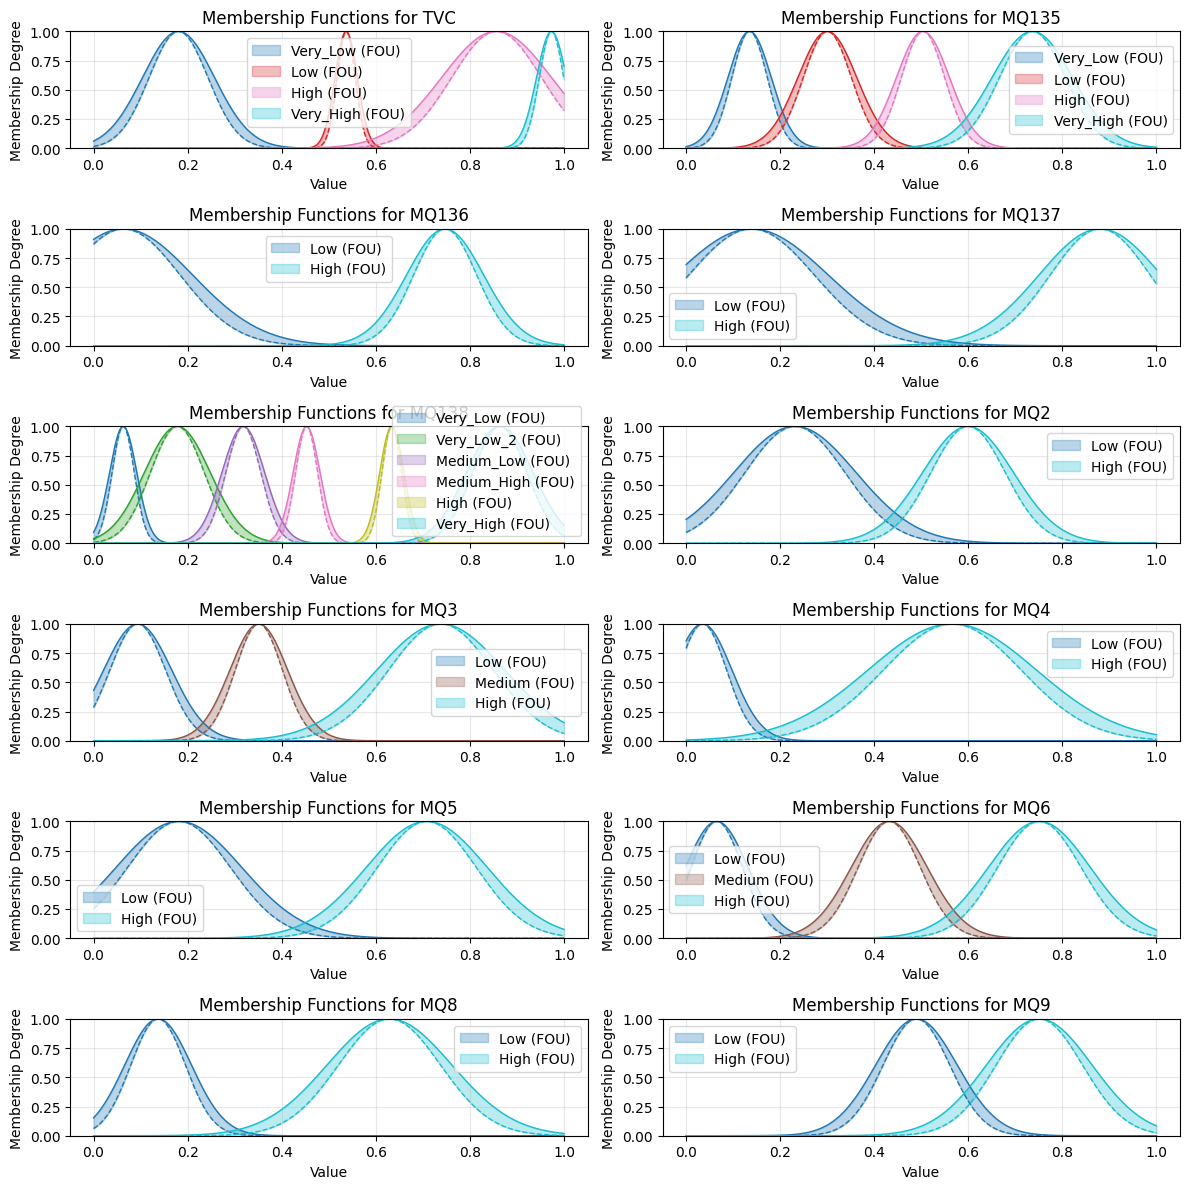

In [16]:
predictor.plot_mfs_grid()

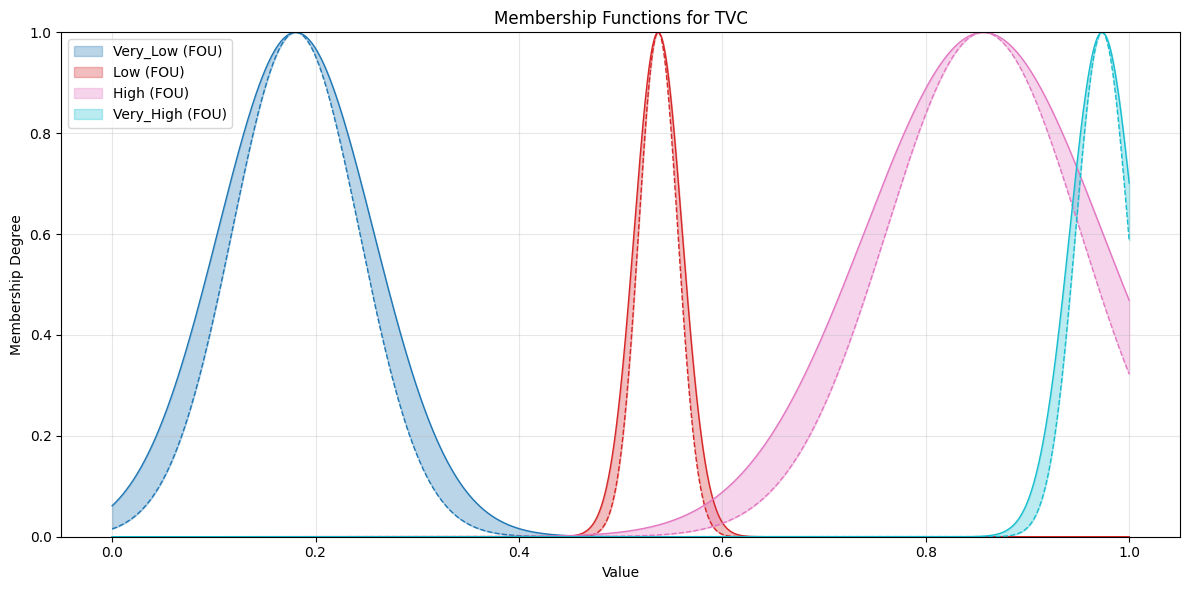

In [17]:
predictor.plot_mf('TVC')

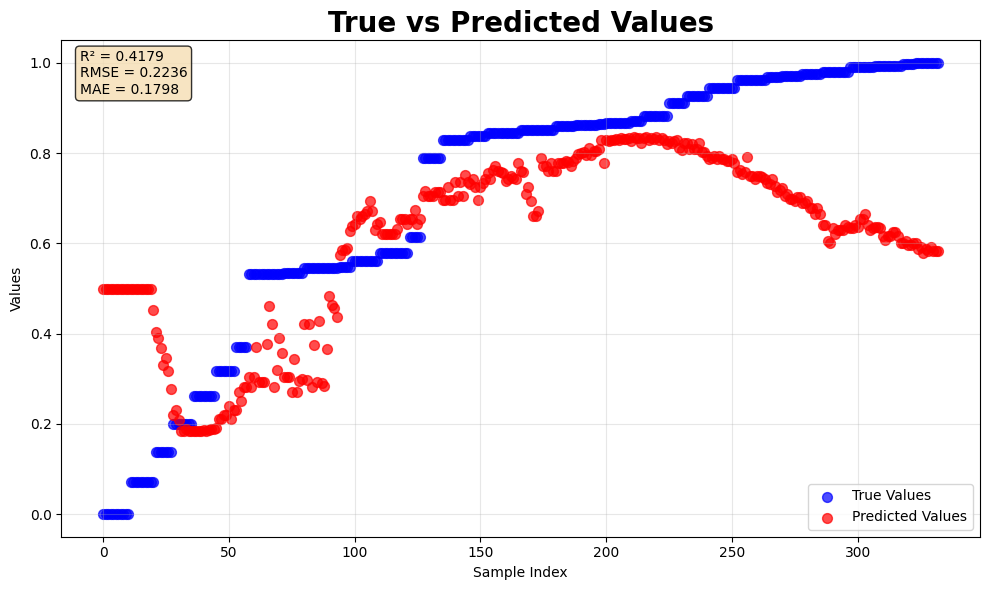

In [18]:
predictor.plot_true_vs_pred(y_test_, y_pred_)